<a href="https://colab.research.google.com/github/waithakaFM910/gpt_ask/blob/main/ChatpotPycharm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.0 Data preparation

In [27]:
import nltk
import numpy as np
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# Takes in a string text as inputs and returns ah  list of token
def tokenize(sentence):
  return nltk.word_tokenize(sentence)

# Reduce a word to its base or root form
def stem(word):
  return stemmer.stem(word.lower())

# Representation of text data as a vector of word occurrences
def bag_of_words(tokinized_sentence, all_words):
  """
  sentence = ['hello', 'how', 'are', 'you']
  words = ['hi', 'hello', 'I', 'you', 'bye', 'thank', 'cool']
  bag   = [ 0,      1,      0,    1,    0,      0,      0]
  """
  tokenized_sentence = [stem(w) for w in tokinized_sentence]

  bag = np.zeros(len(all_words), dtype=np.float32)
  for idx, w in enumerate(all_words):
    if w in tokenized_sentence:
      bag[idx] = 1.0
  return bag

# sentence = ['hello', 'how', 'are', 'you']
# words = ['hi', 'hello', 'I', 'you', 'bye', 'thank', 'cool']
# bag   = bag_of_words(sentence, words)

# print(bag)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
from tkinter.constants import W
import json

# Load the data
with open('intent.json', 'r') as file:
  data = json.load(file)

all_words = []
tags = []
pattern_tags = []

for intent in data['intents']:
  tag = intent['tag']
  tags.append(tag)
  for pattern in intent['patterns']:
    w = tokenize(pattern)
    all_words.extend(w)
    pattern_tags.append((w, tag))

ignore_words = ['?', '.', '!', ',']
all_words = [stem(w) for w in all_words if w not in ignore_words]

all_words = sorted(set(all_words))
tags = sorted(set(tags))

print(f'{all_words} \n')
print(tags)

["'s", 'a', 'about', 'account', 'an', 'anyon', 'are', 'bye', 'call', 'can', 'complaint', 'could', 'creat', 'do', 'for', 'give', 'goodby', 'hand', 'have', 'hay', 'hello', 'help', 'hey', 'hi', 'how', 'i', 'is', 'later', 'me', 'name', 'need', 'new', 'open', 'pleas', 'rais', 'see', 'servic', 'should', 'support', 'thank', 'that', 'the', 'there', 'to', 'want', 'what', 'who', 'you', 'your'] 

['about', 'complaint', 'createaccount', 'goodbye', 'greeting', 'help', 'name', 'thanks']


### 1.1 Convert the words into bag of words then into Numpy array

In [29]:
import numpy as np


X_train = []
y_train = []

for (pattern_sentence, tag) in pattern_tags:
  bag = bag_of_words(pattern_sentence, all_words)
  X_train.append(bag)

  label = tags.index(tag)
  y_train.append(label) # for CrossEntropyLoss

X_train = np.array(X_train)
y_train = np.array(y_train)

### 1.2 Visualize, visualize, visualize

In [30]:
X_train[:5], y_train[:10]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

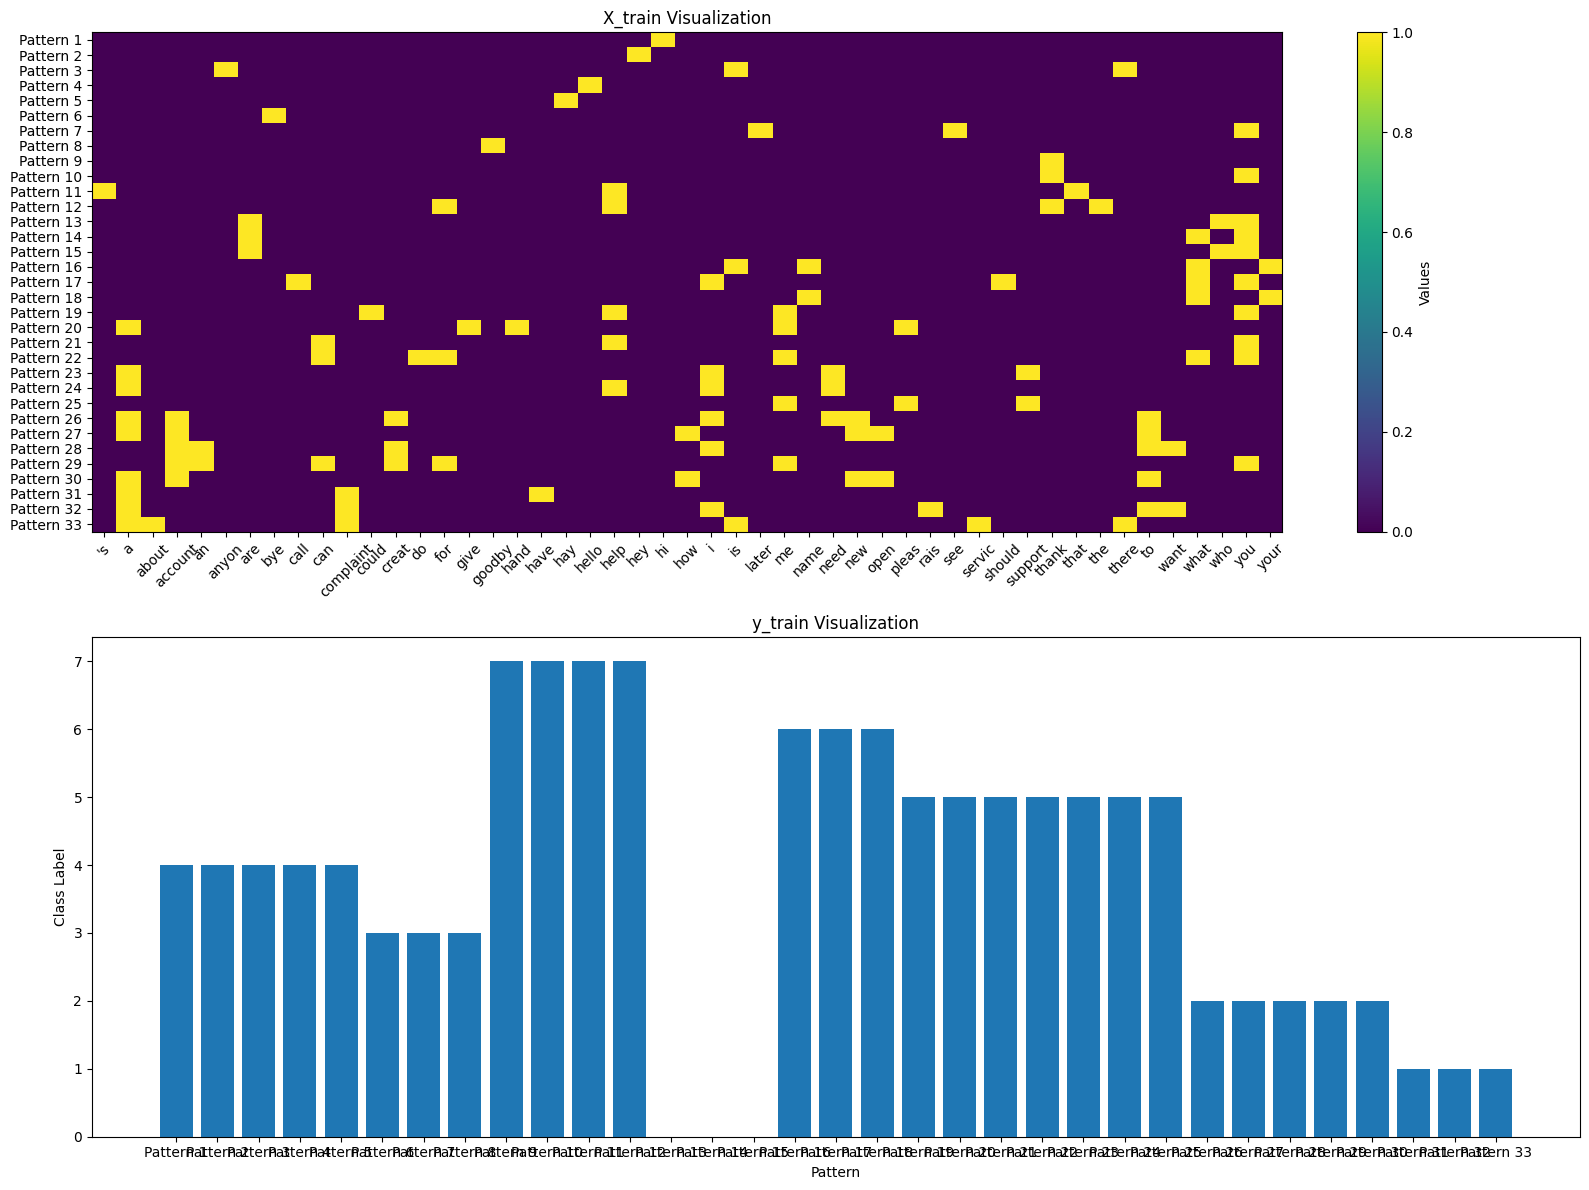

In [31]:
import matplotlib.pyplot as plt


# Visualization
plt.figure(figsize=(16, 12))

# Plot X_train
plt.subplot(2, 1, 1)
plt.imshow(X_train, cmap='viridis', aspect='auto')
plt.colorbar(label='Values')
plt.xticks(range(len(all_words)), all_words, rotation=45)
plt.yticks(range(len(pattern_tags)), ['Pattern {}'.format(i+1) for i in range(len(pattern_tags))])
plt.title('X_train Visualization')

# Plot y_train
plt.subplot(2, 1, 2)
plt.bar(range(len(y_train)), y_train)
plt.xticks(range(len(y_train)), ['Pattern {}'.format(i+1) for i in range(len(pattern_tags))])
plt.xlabel('Pattern')
plt.ylabel('Class Label')
plt.title('y_train Visualization')

plt.tight_layout()
plt.show()

### 1.2 Turn our data into torch tensors

Sets up a custom dataset and data loader for training a neural network using PyTorch.

In [32]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [33]:
class ChatDataset(Dataset):
  def __init__(self):
    self.n_samples = len(X_train)
    self.x_data = X_train
    self.y_data = y_train

  # dataset[idx]
  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__ (self):
    return self.n_samples

 The data loader will take care of converting the data returned by the `ChatDataset` class into PyTorch tensors

In [34]:
# Hyperparameters
batch_size = 8

dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

train_loader


# Iterate over the data loader and print the batches
for batch_idx, (inputs, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}:")
    print("Inputs:")
    print(inputs[:5])
    print("Labels:")
    print(labels[:5])
    print("=" * 20)

Batch 0:
Inputs:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

In [35]:
# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [36]:
len(X_train[0]), len(tags)

(49, 8)

In [37]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_size, out_features=hidden_size),
        nn.ReLU(),
        nn.Linear(in_features=hidden_size, out_features=hidden_size),
        nn.ReLU(),
        nn.Linear(in_features=num_classes, out_features=num_classes)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_0 = NeuralNet(input_size=49, # len(X_train[0])
                  hidden_size=8,
                  num_classes=8).to(device) # len(tags)

model_0

NeuralNet(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=49, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
  )
)

## Create a loss function and optimizers

In [38]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

## Training and testing loop

In [39]:
# Fit the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000


for epoch in range(epochs):
  ## Training
  model_0.train()

  # Unpack words and labels and set the device
  for (words, labels) in train_loader:
    words = words.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model_0(words)

    # Loss
    loss = loss_fn(outputs, labels)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # Print out what's happening
  if epoch % 100 == 0:
    print(f'epoch: {epoch}, loss={loss.item():.4f}')

# Final loss
print(f'final loss, loss={loss.item():.4f}')


epoch: 0, loss=2.2714
epoch: 100, loss=1.6720
epoch: 200, loss=0.1411
epoch: 300, loss=0.0021
epoch: 400, loss=0.0022
epoch: 500, loss=0.0021
epoch: 600, loss=0.0011
epoch: 700, loss=0.0021
epoch: 800, loss=0.0008
epoch: 900, loss=0.0006
final loss, loss=0.0002


## Saving the model

In [40]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'chabot_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/chabot_model.pth


## Load and implementing the actual chat

In [41]:
# Create a new Instance of the model
loaded_model_0 = NeuralNet(input_size=49, hidden_size=8, num_classes=8)

# Load the saved model_0 state_dict
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_0.to(device)


NeuralNet(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=49, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
  )
)

In [42]:
# Evaluation mode
loaded_model_0.eval()

NeuralNet(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=49, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
  )
)

In [43]:
import random

# create chat
bot_name = 'Mr Bot'
print("Ask me anything(I don't mean it literally, just ask what is within my capacit)")
while True:
  sentence = input('User: ')
  if sentence == 'quit':
    break

  sentence = tokenize(sentence)
  X = bag_of_words(sentence, all_words)
  X = X.reshape(1, X.shape[0])
  X = torch.from_numpy(X)

  X = X.to(device)

  output = model_0(X)
  _, predicted = torch.max(output, dim=1)
  tag = tags[predicted.item()]

  probs = torch.softmax(output, dim=1)
  prob = probs[0][predicted.item()]

  if prob.item() > 0.75:
    for intent in data['intents']:
        if tag == intent['tag']:
            print(f"{bot_name}: {random.choice(intent['responses'])}")
  else:
    print("I don't understand...")



Ask me anything(I don't mean it literally, just ask what is within my capacit)
User: hi
Mr Bot: Hi there
User: who are you
Mr Bot: I'm Franco Mwenyewe, an Artificial Intelligent bot
User: what are you
Mr Bot: I'm Franco Mwenyewe, an Artificial Intelligent bot
User: What should I call you
Mr Bot: I'm Franco Mwenyewe!
User: I need your help
Mr Bot: Tell me how can assist you
User: I'm having trouble in opening my account
Mr Bot: You can just easily create a new account from our web site
User: Okay, thank you
Mr Bot: You're most welcome!
User: Have a lovely day
Mr Bot: Please provide us your complaint in order to assist you
User: I said good bye
Mr Bot: Have a nice day
User: you too, good night
I don't understand...
User: You are very stupid
Mr Bot: I'm Franco Mwenyewe, an Artificial Intelligent bot
User: quit
